# Module 4: Work with data professionally!

## Lab work 4



#### Мета: 

* навчитися обробляти дані
* "парсити" сайти

### Завдання 1:

#### Ознайомитися із API Національного банку 
https://bank.gov.ua/ua/



1. Підключитися до API.


In [1]:
import requests
import json

2. Отримати курс долара за останній рік.

In [2]:
import xml.etree.ElementTree as ET
from datetime import date, timedelta

end_date = date.today()

start_date = (end_date - timedelta(days=365))

start_date_formatted = start_date.strftime("%Y%m%d")
end_date_formatted = end_date.strftime("%Y%m%d")

print(f'Курс долара НБУ за останній рік з {start_date.strftime("%d.%m.%Y")} по {end_date.strftime("%d.%m.%Y")}:')
req = requests.get(f'https://bank.gov.ua/NBU_Exchange/exchange_site?start={start_date_formatted}&end={end_date_formatted}&valcode=usd')

req2 = req.text


root = ET.fromstring(req2)

for currency in root.findall('.//currency'):
    exchangedate = currency.find('exchangedate').text
    rate = currency.find('rate').text
    print(exchangedate, rate)

Курс долара НБУ за останній рік з 10.08.2022 по 10.08.2023:
10.08.2022 36.5686
11.08.2022 36.5686
12.08.2022 36.5686
13.08.2022 36.5686
14.08.2022 36.5686
15.08.2022 36.5686
16.08.2022 36.5686
17.08.2022 36.5686
18.08.2022 36.5686
19.08.2022 36.5686
20.08.2022 36.5686
21.08.2022 36.5686
22.08.2022 36.5686
23.08.2022 36.5686
24.08.2022 36.5686
25.08.2022 36.5686
26.08.2022 36.5686
27.08.2022 36.5686
28.08.2022 36.5686
29.08.2022 36.5686
30.08.2022 36.5686
31.08.2022 36.5686
01.09.2022 36.5686
02.09.2022 36.5686
03.09.2022 36.5686
04.09.2022 36.5686
05.09.2022 36.5686
06.09.2022 36.5686
07.09.2022 36.5686
08.09.2022 36.5686
09.09.2022 36.5686
10.09.2022 36.5686
11.09.2022 36.5686
12.09.2022 36.5686
13.09.2022 36.5686
14.09.2022 36.5686
15.09.2022 36.5686
16.09.2022 36.5686
17.09.2022 36.5686
18.09.2022 36.5686
19.09.2022 36.5686
20.09.2022 36.5686
21.09.2022 36.5686
22.09.2022 36.5686
23.09.2022 36.5686
24.09.2022 36.5686
25.09.2022 36.5686
26.09.2022 36.5686
27.09.2022 36.5686
28.09.202

3. Вивести середнє значення та відхилення курсу за кожний місяць.

In [3]:
monthly_data = {}  # Словник для збереження даних по місяцях
results = []  # Список для збереження результатів

for currency in root.findall('.//currency'):
    exchangedate = currency.find('exchangedate').text
    rate = float(currency.find('rate').text)
    month = exchangedate.split('.')[1]  # Виділяємо номер місяця з дати
    monthly_data.setdefault(month, []).append(rate) # Додаємо курс до списку для цього місяця


for month, rates in monthly_data.items():
    average_rate = sum(rates) / len(rates) # обчислюємо середнє значення
    deviation = [abs(rate - average_rate) for rate in rates]
    average_deviation = sum(deviation) / len(deviation) #обчислюємо середнє відхилення
    results.append({
        'month': month,
        'average_rate': average_rate,
        'average_deviation': average_deviation
    })
    
    print(f"Місяць {month}: Середній курс = {average_rate:.4f}, Середнє відхилення = {average_deviation:.4f}")

Місяць 08: Середній курс = 36.5686, Середнє відхилення = 0.0000
Місяць 09: Середній курс = 36.5686, Середнє відхилення = 0.0000
Місяць 10: Середній курс = 36.5686, Середнє відхилення = 0.0000
Місяць 11: Середній курс = 36.5686, Середнє відхилення = 0.0000
Місяць 12: Середній курс = 36.5686, Середнє відхилення = 0.0000
Місяць 01: Середній курс = 36.5686, Середнє відхилення = 0.0000
Місяць 02: Середній курс = 36.5686, Середнє відхилення = 0.0000
Місяць 03: Середній курс = 36.5686, Середнє відхилення = 0.0000
Місяць 04: Середній курс = 36.5686, Середнє відхилення = 0.0000
Місяць 05: Середній курс = 36.5686, Середнє відхилення = 0.0000
Місяць 06: Середній курс = 36.5686, Середнє відхилення = 0.0000
Місяць 07: Середній курс = 36.5686, Середнє відхилення = 0.0000


4. Дану інформацію записати у файл за допомогою pickle.

In [4]:
import pickle

with open('exchange_results_file.pkl', 'wb') as f:
    pickle.dump(results, f)

print("Файл збережено")

Файл збережено


### Завдання 2:

Потрібно проаналізувати всі товари на сайті: 
https://smallpacking.agrosem.ua/

Створіть базу даних, що містить таблицю із такими стовбцями: 
    - артикул товару
    - найменування
    - ціна 
    - вага

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# заходимо на сайт та отримуємо cookies для обходу блокування даних на сторінках пагінації
url = f'https://smallpacking.agrosem.ua/'
session = requests.Session()
response = session.get(url)
cookies = session.cookies.get_dict();
hdr = { 'Cookie': f"PHPSESSID={cookies['PHPSESSID']}" }

product_list=[] #для зберігання даних про товари


for page_number in range(1, 10+1): # цикл для 10 сторінок товарів категорії "Добрива" з 112 товарами
        url = f'https://smallpacking.agrosem.ua/products/?page={page_number}'
        response = requests.get(url, headers=hdr)
        soup = BeautifulSoup(response.text, 'html.parser')
        product_cards = soup.find_all('div', class_='item')
        for card in product_cards:
            product_id = card.attrs['data-id']
            name = card.find('div', class_='info').find('a').text
            price = card.find('p', class_='price').text.replace(' ₴', '').replace(' ', '')
            weight = card.find('p', class_='key weight').find('span').text
            product_list.append([product_id, name, price, weight])

for page_number in range(1, 11+1): #цикл для 11 сторінок товарів категорії "Насіння" з 127 товарами
        url = f'https://smallpacking.agrosem.ua/hybrids/?page={page_number}'
        response = requests.get(url, headers=hdr)
        soup = BeautifulSoup(response.text, 'html.parser')
        product_cards = soup.find_all('div', class_='item crop')
        for card in product_cards:
            product_id = card.find('div', class_='rate').find('span').attrs['model-id']
            name = card.find('div', class_='info').find('a', class_='key').attrs['full-name']
            price = card.find('a', class_='ico buy').attrs['data-buy']
            weight = ''
            product_list.append([product_id, name, price, weight])

# в результаті отримуємо БД з 239 товарами
df = pd.DataFrame(product_list, columns=['Product ID', 'Name', 'Price', 'Weight'])
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(df)


Product ID                                               Name  \
0         1542  ДОБРИВО ДЛЯ ВІЧНОЗЕЛЕНИХ ДЕРЕВ ТА КУЩІВ ОСІНЬ ...   
1         1610    ДОБРИВО ДЛЯ ХВОЙНИХ РОСЛИН, Yara Folicare 180 г   
2         1608  ДОБРИВО ДЛЯ САМШИТУ ТА ВІЧНОЗЕЛЕНИХ ЧАГАРНИКІВ...   
3         1536                     ДОБРИВО ДЛЯ ГАЗОНУ ОСІНЬ 10 кг   
4         1523  ДОБРИВО ДЛЯ ВІЧНОЗЕЛЕНИХ ДЕРЕВ ТА КУЩІВ ОСІНЬ ...   
5         1528                      ДОБРИВО ДЛЯ ГАЗОНУ ОСІНЬ 1 кг   
6         1525           ДОБРИВО УНІВЕРСАЛЬНЕ ГРУНТОВЕ ОСІНЬ 1 кг   
7         1537  ДОБРИВО ДЛЯ ДЕКОРАТИВНИХ ЛИСТОВИХ ВЕСНА-ЛІТО 3 кг   
8         1538  ДОБРИВО ДЛЯ ВІЧНОЗЕЛЕНИХ ДЕРЕВ ТА КУЩІВ ВЕСНА-...   
9         1539  ДОБРИВО ДЛЯ ДЕКОРАТИВНИХ ЛИСТОВИХ ВЕСНА-ЛІТО 1 кг   
10        1540                            ДОБРИВО ДЛЯ ОВОЧІВ 3 кг   
11        1541                         ДОБРИВО ДЛЯ ВИНОГРАДУ 1 кг   
12        1543                 ДОБРИВО ДЛЯ ГАЗОНУ ВЕСНА-ЛІТО 1 кг   
13        1544                            ДОБРИВО ДЛЯ ОВОЧІВ 1 кг   
14        1545                           ДОБРИВО ДЛЯ РОЗСАДИ 1 кг   
15        1546                  ДОБРИВО ДЛЯ ТЕПЛИЧНИХ ОВОЧІВ 3 кг   
16        1547                            ДОБРИВО ДЛЯ ТРОЯНД 1 кг   
17        1548  ДОБРИВО ДЛЯ ВІЧНОЗЕЛЕНИХ ДЕРЕВ ТА КУЩІВ ВЕСНА-...   
18        1549                ДОБРИВО ДЛЯ ГАЗОНУ ВЕСНА-ЛІТО 10 кг   
19        1550                  ДОБРИВО ДЛЯ ТЕПЛИЧНИХ ОВОЧІВ 1 кг   
20        1551                                         PULAN 34.4   
21        1554                                 SALETRZAK 27 MACRO   
22        1555                               SIARCZAN AS 21 MACRO   
23        1556                                   YARABELA СУЛЬФАН   
24        1557                          YARAMILA NP 20-20 +9,0SO3   
25        1558                              YARAMILA NPK 12-24-12   
26        1559                              YARAMILA NPK 16-16-16   
27        1560                               YARAMILA NPK 16-27-7   
28        1562                               YARAMILA NPK 7-20-28   
29        1563                               YARAMILA NPK 8-24-24   
30        1564       YARAMILA NPK 9-12-25 + 2MGO + 6,5SO3 + MICRO   
31        1565                       СУЛЬФАТ МАГНІЮ ГРАНУЛЬОВАНИЙ   
32        1566                    FERTICARE HYDRO 6-14-30 + MICRO   
33        1567                   FERTICARE KOMBI 14-11-25 + MICRO   
34        1568                       YARATERA SOP (СУЛЬФАТ КАЛІЮ)   
35        1569                YARATERA КRISTA MAG (НІТРАТ МАГНІЮ)   
36        1570                            КRISTA К (НІТРАТ КАЛІЮ)   
37        1571                     КRISTA МАР (МОНОАМОНІЙ ФОСФАТ)   
38        1572                      КRISTA МКР (МОНОКАЛІЙ ФОСФАТ)   
39        1573                      СУЛЬФАТ МАГНІЮ (СЕМИВОДНЕВИЙ)   
40        1574                   ЯРА (FOLICARE) NPK 10-5-40+MICRO   
41        1575                         ЯРА (FOLICARE) NPK 12-0-38   
42        1576                   ЯРА (FOLICARE) NPK 12-46-8+MICRO   
43        1577                  ЯРА (FOLICARE) NPK 18-18-18+MICRO   
44        1578                   ЯРА (FOLICARE) NPK 22-5-22+MICRO   
45        1579                               ЯРА FERTICARE TOMATO   
46        1580                                ЯРА FERTICARE ОВОЧІ   
47        1581                               YARAVITA ФОСАМКО БІО   
48        1583  ДОБРИВО НА ОСНОВІ ВИТЯЖКИ МОРСЬКИХ ВОДОРОСТЕЙ ...   
49        1584                            YARAVITA ТЕПРОСИН NP+ZN   
50        1586                                   YARAVITA БОРТРАК   
51        1587                             YARAVITA БРАСІТРЕЛ ПРО   
52        1588                                 YARAVITA ГРАМІТРЕЛ   
53        1589                                  YARAVITA КОМБІФОС   
54        1590                                  YARAVITA МАНКОЦИН   
55        1591                               YARAVITA МАНТРАК ПРО   
56        1592                                 YARAVITA МАЇЗ БУСТ   
57

### Завдання 3: 

Ознайомтеся із роботою SQLite та відповідним модулем у Python.
Завантажте базу даних для виконання лабораторної роботи.
Підключіться до завантаженої бази SQLite.

1. Виведіть інформацію про дану базу.

In [6]:
import pandas as pd
import sqlite3

con = sqlite3.connect('/Users/olha/Desktop/pyth/task 4.1/tysql-1.sqlite')
curs = con.cursor()
print("База даних успішно підключена")

version = "SELECT sqlite_version();"
curs.execute(version)
record = curs.fetchall()
print("Версія БД: ", record)

База даних успішно підключена
Версія БД:  [('3.40.1',)]


2. Виведіть перелік всіх таблиць.

In [7]:
import sqlite3

tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
curs.execute(tables_query)
tables = curs.fetchall()

print("Список таблиць:")
for table in tables:
    print(table[0])

Список таблиць:
Customers
OrderItems
Orders
Products
Vendors


3. Список всіх cust_id з таблиці Customers table.

In [8]:
def query(sql):
    return pd.read_sql(sql, con=con)

In [9]:
sql = 'SELECT cust_id from Customers'
query(sql)

cust_id
0  1000000001
1  1000000002
2  1000000003
3  1000000004
4  1000000005

4. Всю таблицю Customers table

In [10]:
sql = 'SELECT * from Customers'
query(sql)

cust_id      cust_name          cust_address cust_city cust_state  \
0  1000000001   Village Toys        200 Maple Lane   Detroit         MI   
1  1000000002     Kids Place  333 South Lake Drive  Columbus         OH   
2  1000000003        Fun4All         1 Sunny Place    Muncie         IN   
3  1000000004        Fun4All   829 Riverside Drive   Phoenix         AZ   
4  1000000005  The Toy Store      4545 53rd Street   Chicago         IL   

  cust_zip cust_country        cust_contact             cust_email  
0    44444          USA          John Smith  sales@villagetoys.com  
1    43333          USA      Michelle Green                   None  
2    42222          USA           Jim Jones     jjones@fun4all.com  
3    88888          USA  Denise L. Stephens  dstephens@fun4all.com  
4    54545          USA          Kim Howard                   None

5. Список клієнтів (cust_names) відсортованих від Z до A

In [11]:
sql = 'SELECT cust_name from Customers ORDER BY cust_name DESC'
query(sql)

cust_name
0   Village Toys
1  The Toy Store
2     Kids Place
3        Fun4All
4        Fun4All

6. Таблицю клієнтів та замовлень (cust_id і order_num) . Відсортуйте по клієнту і потім по даті замовлення

In [12]:
sql = '''
    SELECT Customers.cust_id, Customers.cust_name, Orders.cust_id, Orders.order_date
    FROM Customers
    INNER JOIN Orders ON Customers.cust_id = Orders.cust_id
    ORDER BY Customers.cust_name, Orders.order_date;
'''

query(sql)

cust_id      cust_name     cust_id  order_date
0  1000000003        Fun4All  1000000003  2012-01-12
1  1000000004        Fun4All  1000000004  2012-01-30
2  1000000005  The Toy Store  1000000005  2012-02-03
3  1000000001   Village Toys  1000000001  2012-02-08
4  1000000001   Village Toys  1000000001  2012-05-01

7. Таблицю (на основі Items) з кількість та вартістю товару. Відсортуйте в порядку спадання по кількості та вартості

In [13]:
sql = 'SELECT OrderItems.prod_id, OrderItems.quantity, OrderItems.item_price from OrderItems ORDER BY quantity DESC, item_price DESC'
query(sql)

prod_id  quantity  item_price
0   BNBG01       250        2.49
1   BNBG02       250        2.49
2   BNBG03       250        2.49
3     BR03       100       10.99
4     BR01       100        5.49
5   BNBG01       100        2.99
6   BNBG02       100        2.99
7   BNBG03       100        2.99
8     BR03        50       11.49
9   RGAN01        50        4.49
10    BR01        20        5.99
11    BR03        10       11.99
12    BR02        10        8.99
13  BNBG01        10        3.49
14  BNBG02        10        3.49
15  BNBG03        10        3.49
16    BR03         5       11.99
17  RGAN01         5        4.99

8. Товар (з таблиці Products), ціна якого становить 9.49

In [14]:
sql = '''SELECT * FROM Products
         WHERE Products.prod_price = '9.49';
'''
query(sql)

prod_id vend_id   prod_name  prod_price  \
0   RYL01   FNG01   King doll        9.49   
1   RYL02   FNG01  Queen doll        9.49   

                                          prod_desc  
0   12 inch king doll with royal garments and crown  
1  12 inch queen doll with royal garments and crown

9. Виведіть назву товару та ціну, яка лежить в діапазоні від  3 до 6. Відсортуйте результат в по ціні в порядку зростання

In [15]:
sql = '''SELECT Products.prod_id, Products.prod_price FROM Products
         WHERE Products.prod_price BETWEEN 3 AND 6
         ORDER BY Products.prod_price;
'''
query(sql)

prod_id  prod_price
0  BNBG01        3.49
1  BNBG02        3.49
2  BNBG03        3.49
3  RGAN01        4.99
4    BR01        5.99

10. Кількість товару, що було продано

In [16]:
sql = '''
    SELECT SUM(quantity) AS total_sold
    FROM OrderItems;
'''
print('Загальна кількість проданих товарів:')
query(sql)

Загальна кількість проданих товарів:


total_sold
0        1430

11. Кількість найменувань товару, ціна якого більша за 4

In [17]:
sql = '''
    SELECT COUNT(prod_id)
    FROM PRODUCTS
    WHERE prod_price >= 4
'''
print('Кількість найменувань товару, ціна якого більша за 4:')
query(sql)

Кількість найменувань товару, ціна якого більша за 4:


COUNT(prod_id)
0               6

12. Розробіть алгоритм для виведення 3 найдорожчих товарів в базі

In [18]:
sql = '''
    SELECT prod_id, prod_name, prod_price
    FROM Products
    ORDER BY prod_price DESC
    LIMIT 3;
'''
print('3 найдорожчі товари в базі:')
query(sql)

3 найдорожчі товари в базі:


prod_id           prod_name  prod_price
0    BR03  18 inch teddy bear       11.99
1   RYL01           King doll        9.49
2   RYL02          Queen doll        9.49

13. Підрахуйте кількість замовлень для кожного клієнта використовуючи підзапити

In [19]:
sql = '''
    SELECT Customers.cust_name, (
        SELECT COUNT(DISTINCT Orders.order_num)
        FROM Orders
        WHERE Orders.cust_id = Customers.cust_id
    ) AS order_count
    FROM Customers
    GROUP BY Customers.cust_name;
'''
query(sql)



cust_name  order_count
0        Fun4All            1
1     Kids Place            0
2  The Toy Store            1
3   Village Toys            2

14. Виведіть список клієнтів та їх замовлення (використайте JOIN)

In [20]:
sql = '''
    SELECT Customers.cust_id, Customers.cust_name, Orders.order_num
    FROM Customers
    INNER JOIN Orders ON Customers.cust_id = Orders.cust_id
    ORDER BY Customers.cust_id;
'''
query(sql)



cust_id      cust_name  order_num
0  1000000001   Village Toys      20005
1  1000000001   Village Toys      20009
2  1000000003        Fun4All      20006
3  1000000004        Fun4All      20007
4  1000000005  The Toy Store      20008

15. Зробіть два запити: список товарів, ціна яких менша 5 та список товарів, ціна який більша рівна 5. Використайте UNION для об'єднання цих запитів

In [21]:
sql = '''
    SELECT prod_name, prod_price
    FROM Products
    WHERE prod_price < 5
    
    UNION
    
    SELECT prod_name, prod_price
    FROM Products
    WHERE prod_price > 5;
'''
query(sql)


prod_name  prod_price
0   12 inch teddy bear        8.99
1   18 inch teddy bear       11.99
2    8 inch teddy bear        5.99
3    Bird bean bag toy        3.49
4    Fish bean bag toy        3.49
5            King doll        9.49
6           Queen doll        9.49
7  Rabbit bean bag toy        3.49
8          Raggedy Ann        4.99

### Завдання 4: 

Зареєструйтеся на сайті  https://www.hackerrank.com/

Виконайте 5 завданнь

Код запитів та короткий опис завдання вставляйте сюди


#### Завдання 1

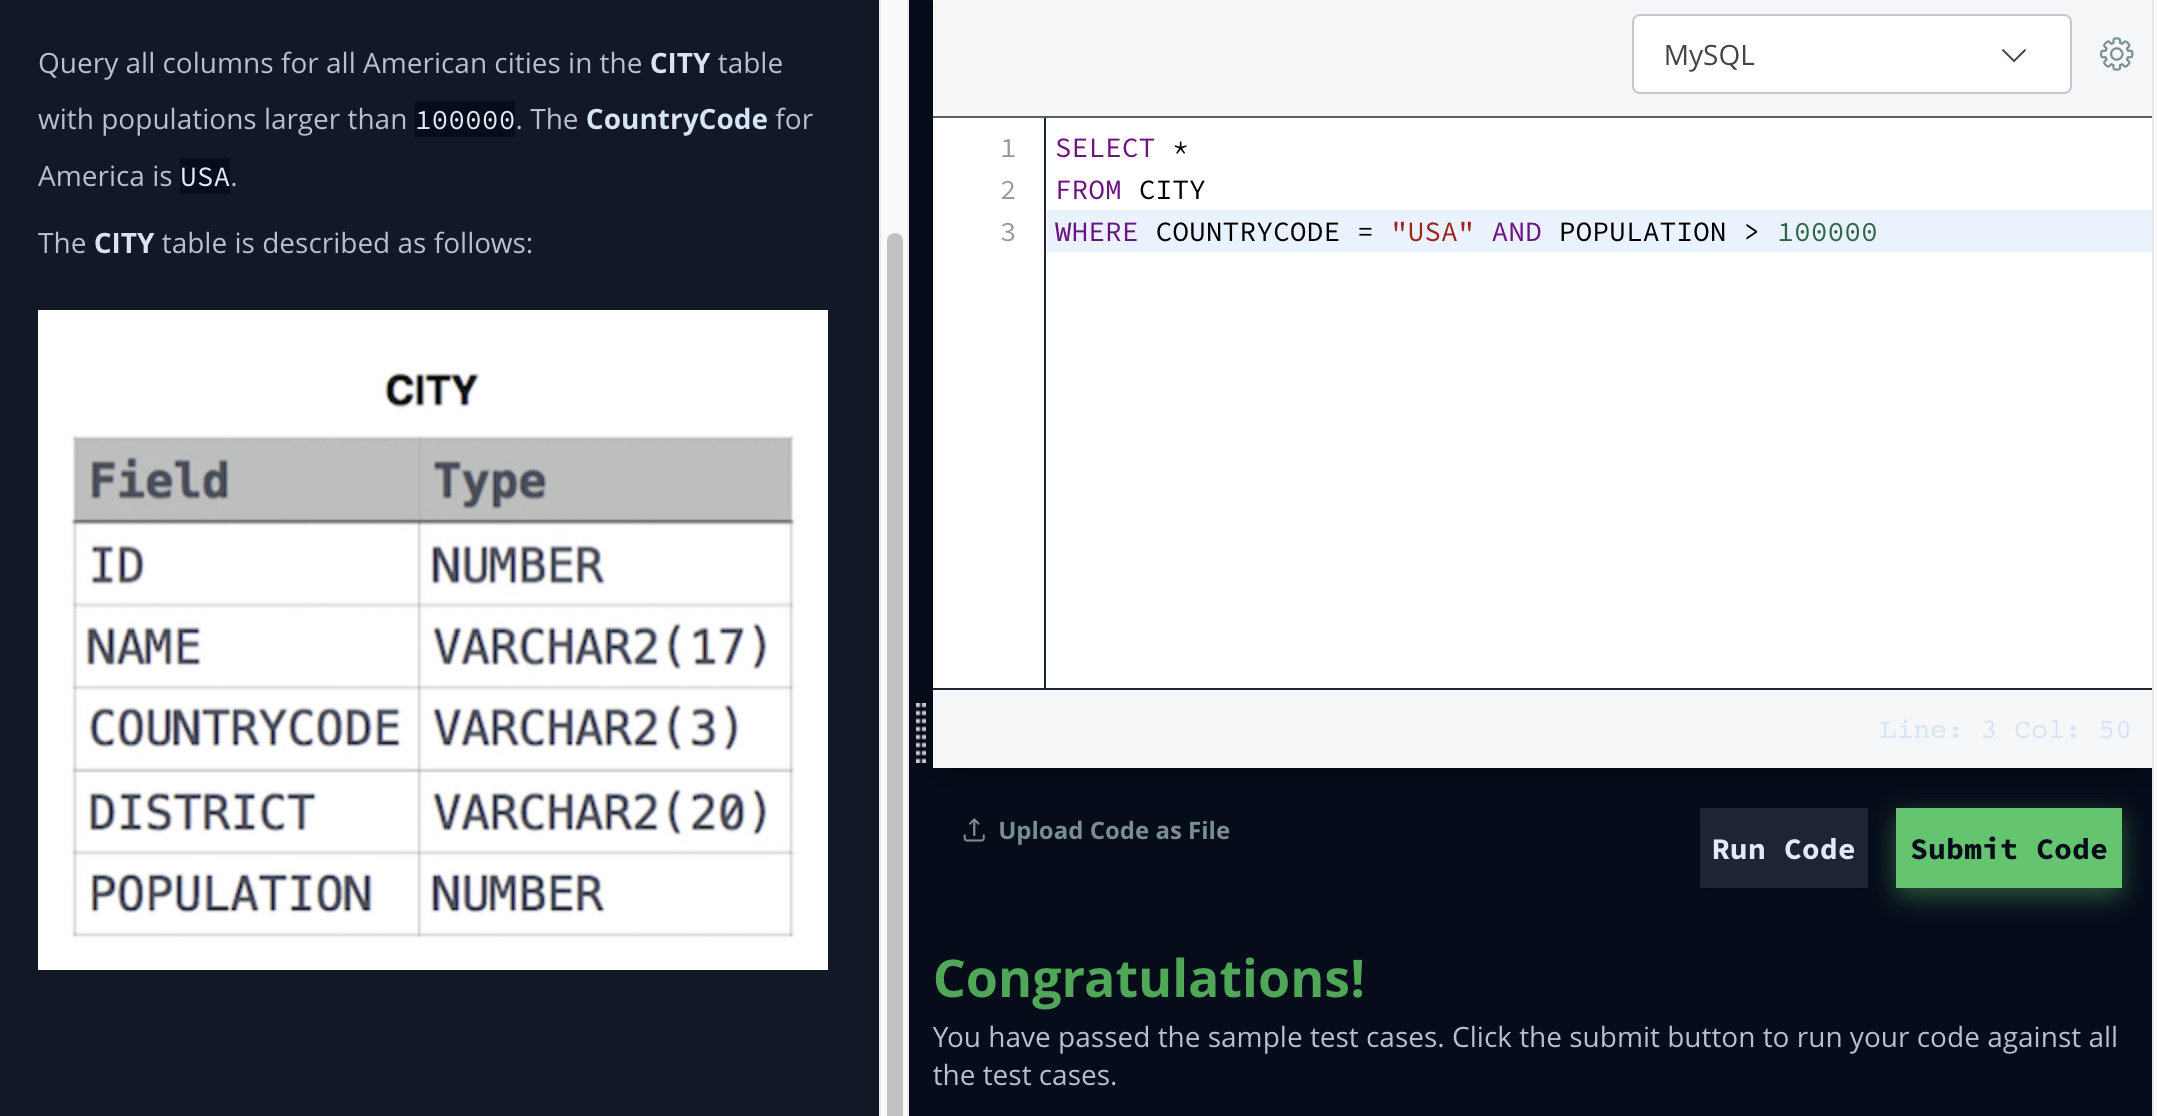

In [22]:
from IPython.display import Image
Image("/Users/olha/Desktop/1TASK.jpg", width=700, height=700)

SELECT *
FROM CITY
WHERE COUNTRYCODE = "USA" AND POPULATION > 100000;

#### Завдання 2

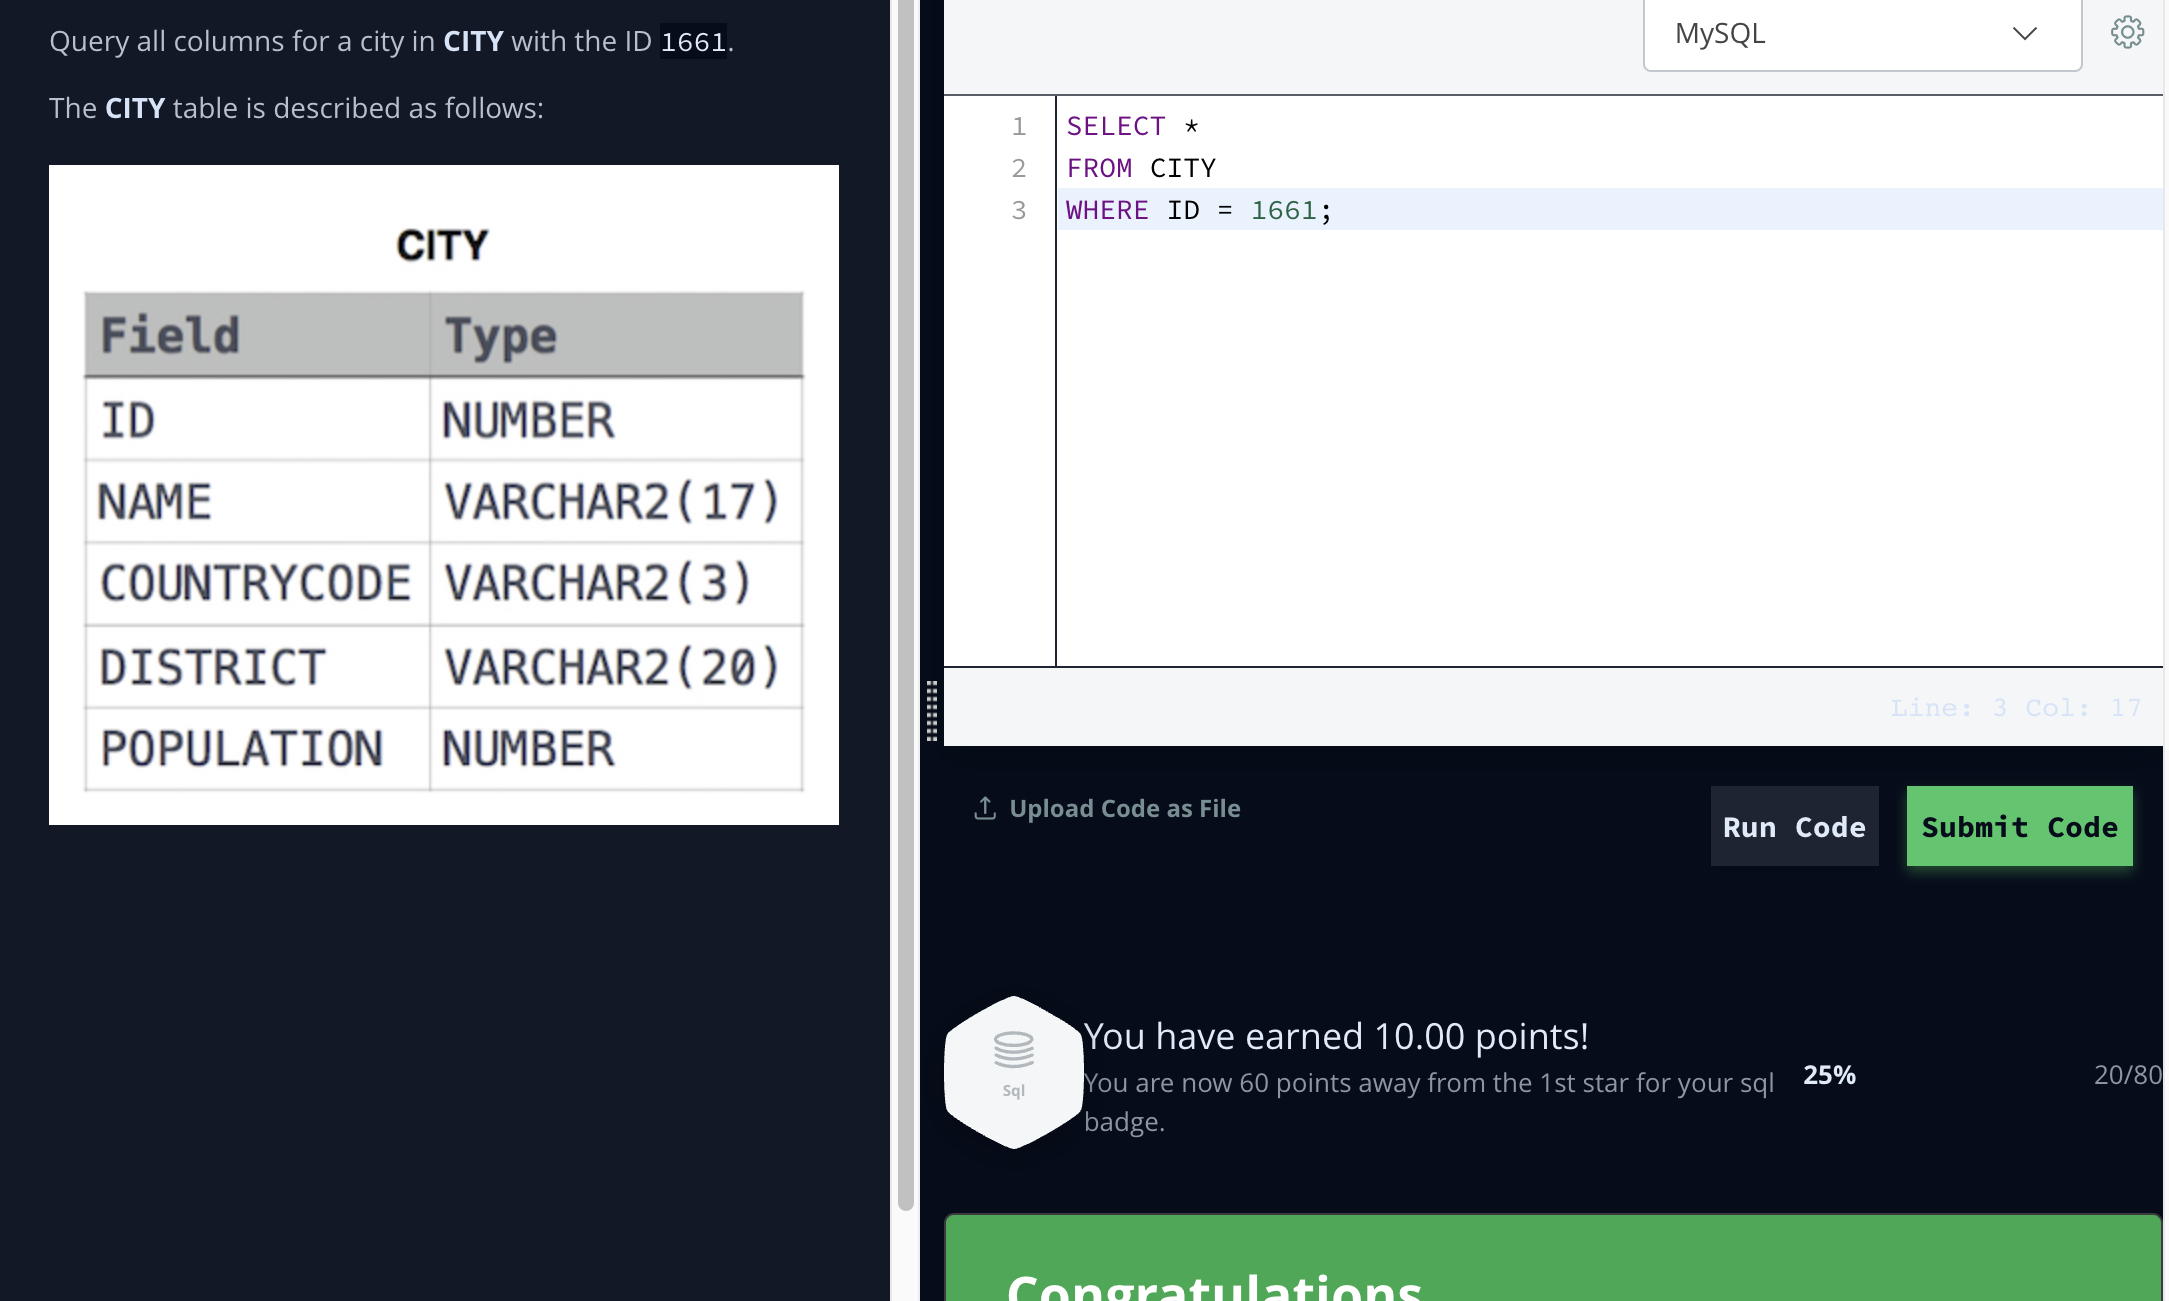

In [23]:
Image("/Users/olha/Desktop/2TASK.jpg", width=700, height=700)

SELECT *
FROM CITY
WHERE ID = 1661;

#### Завдання 3

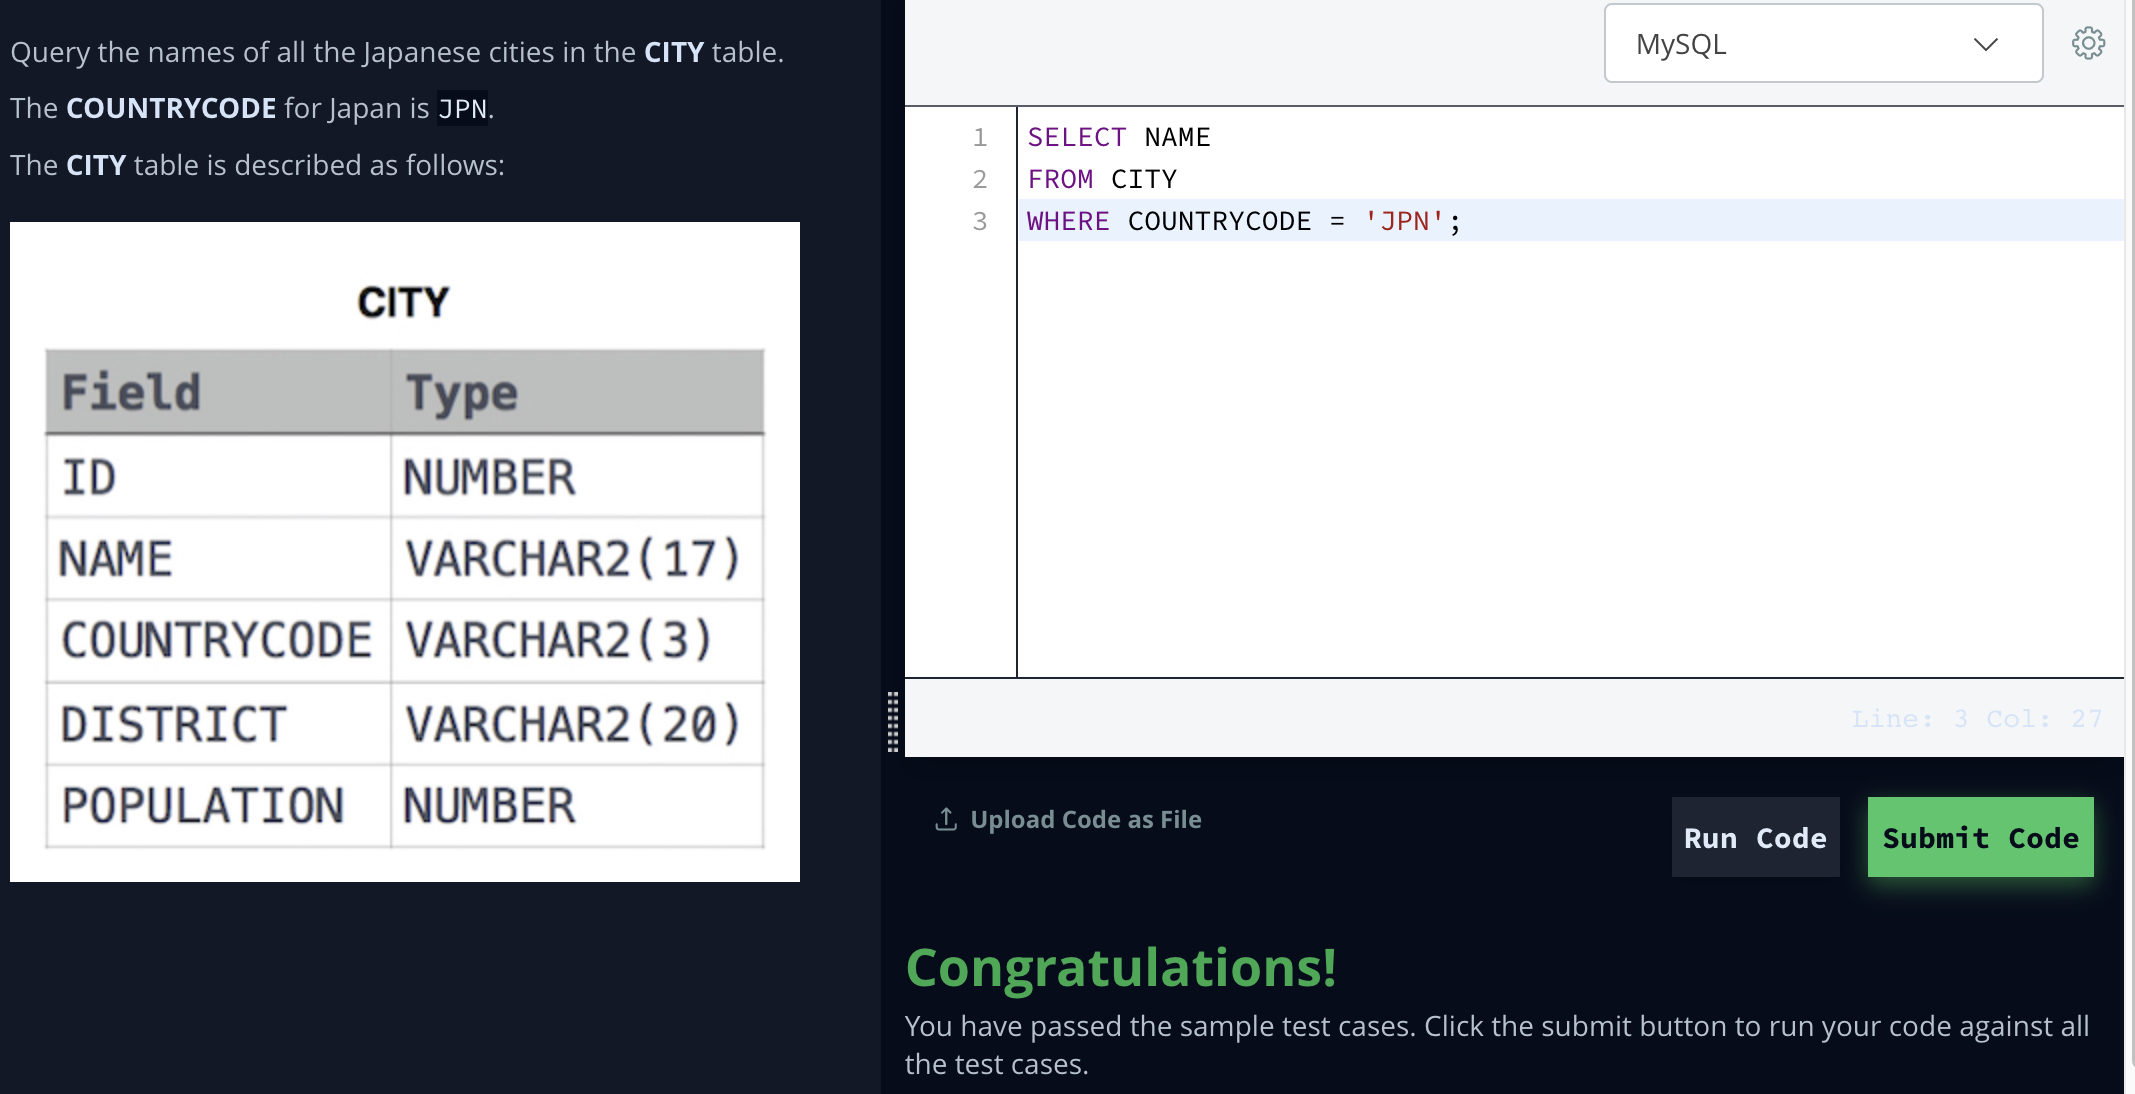

In [24]:
Image("/Users/olha/Desktop/3TASK.jpg", width=700, height=700)

SELECT NAME
FROM CITY
WHERE COUNTRYCODE = 'JPN';

#### Завдання 4

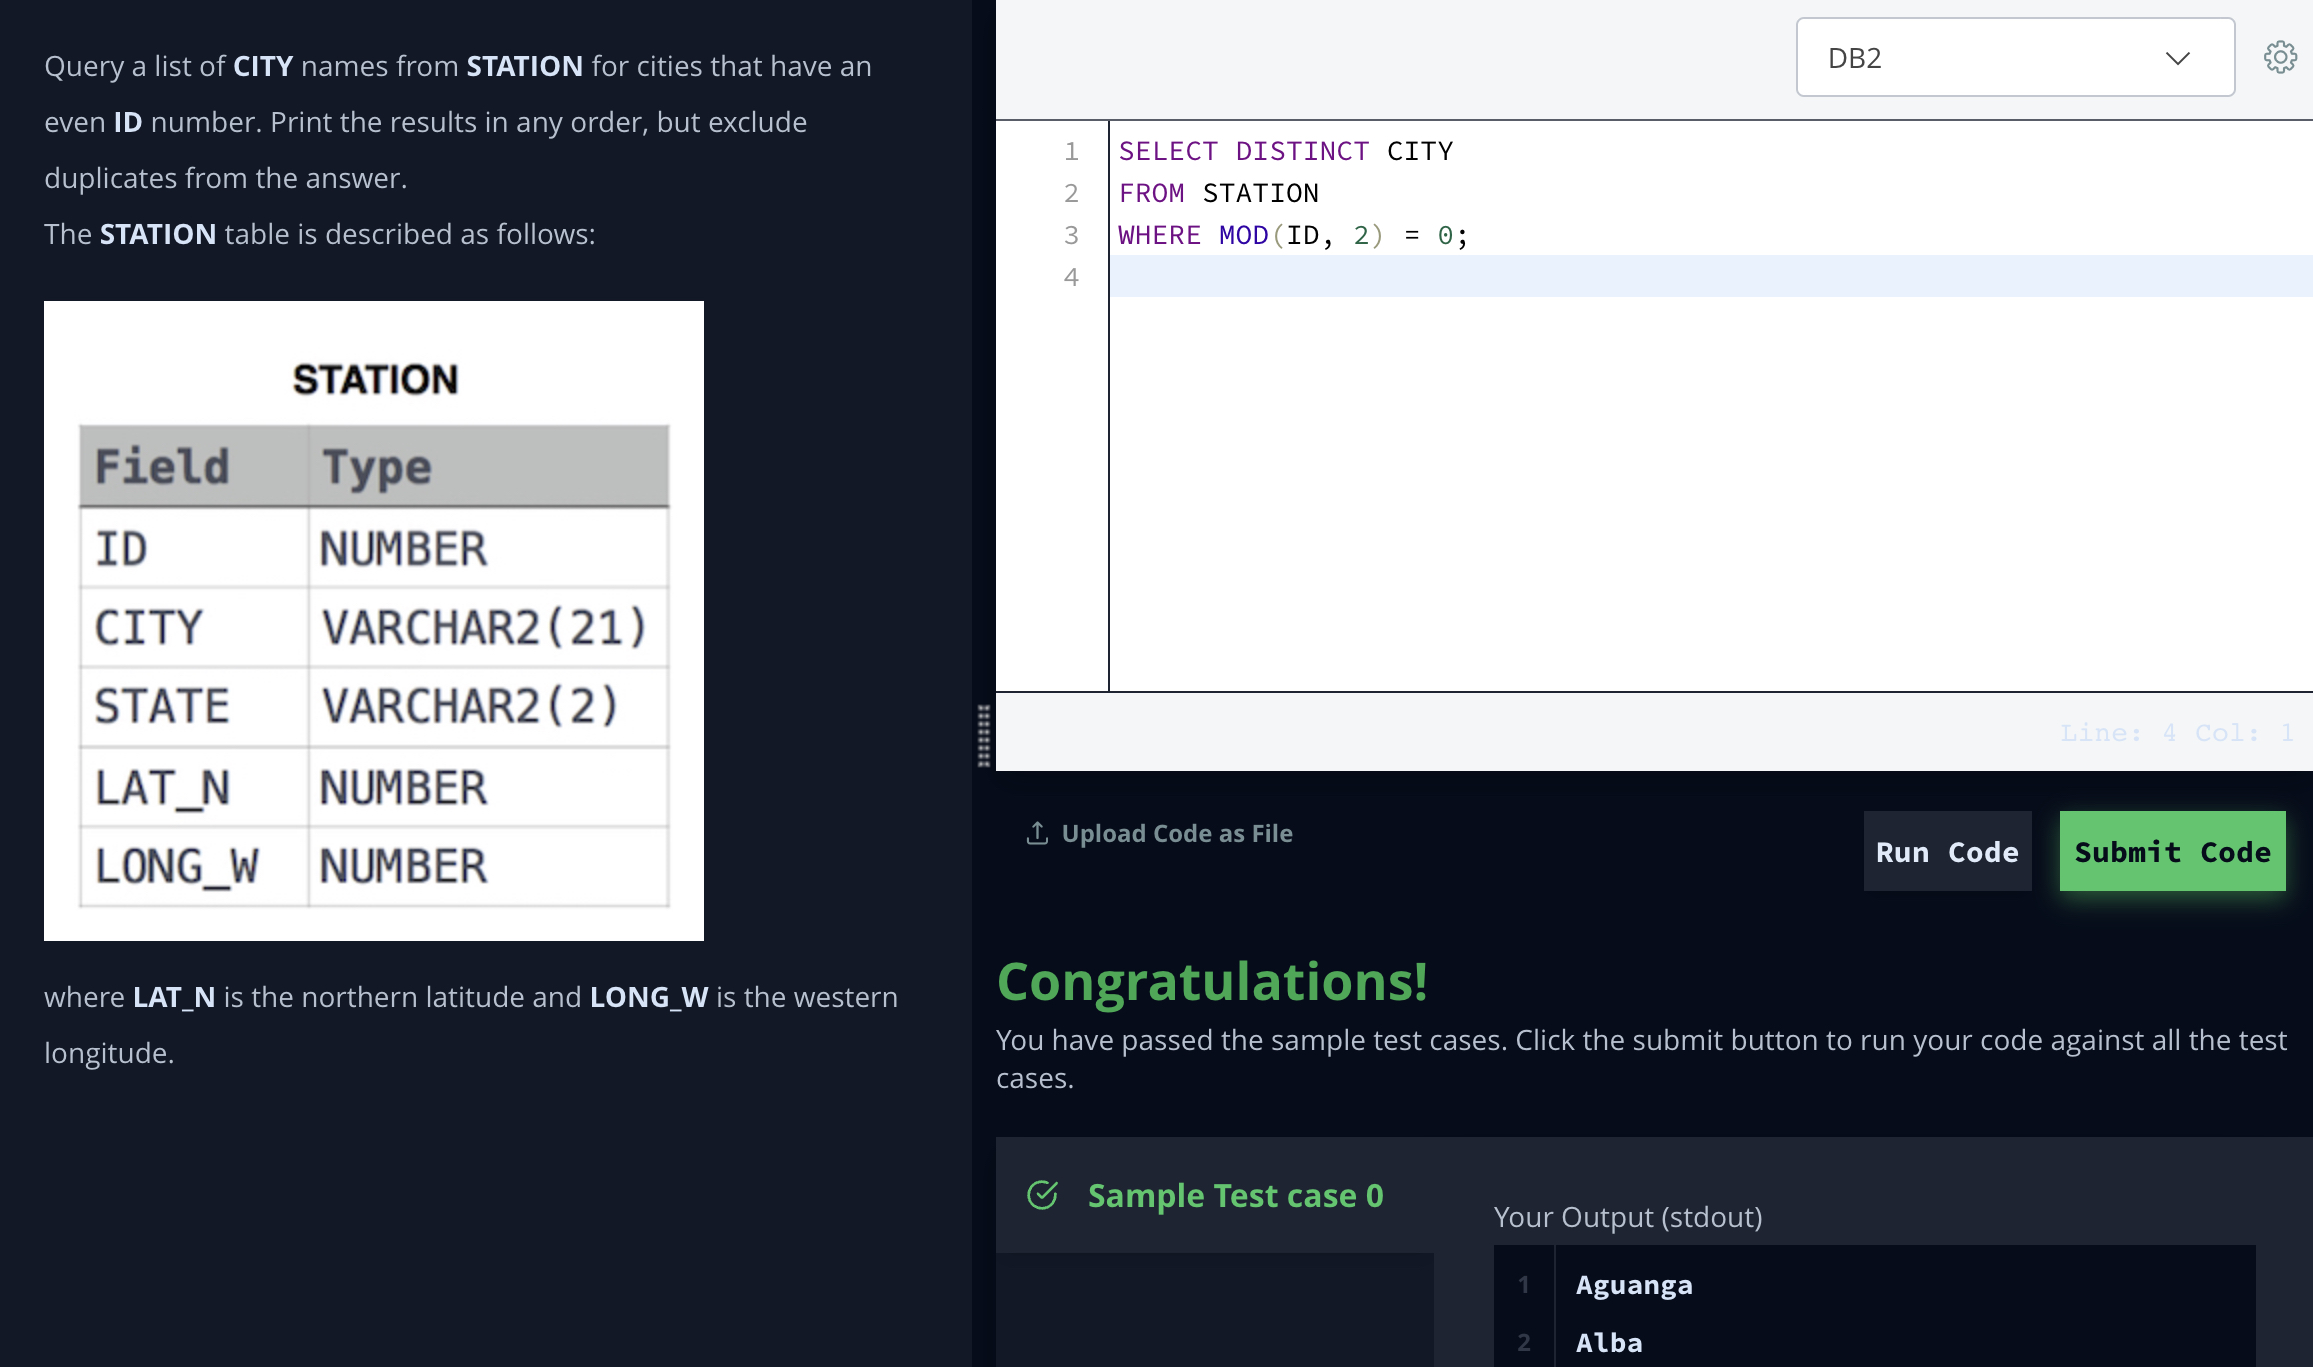

In [25]:
Image("/Users/olha/Desktop/TASK4.jpg", width=700, height=700)

SELECT DISTINCT CITY  
FROM STATION  
WHERE MOD(ID, 2) = 0;

#### Завдання 5

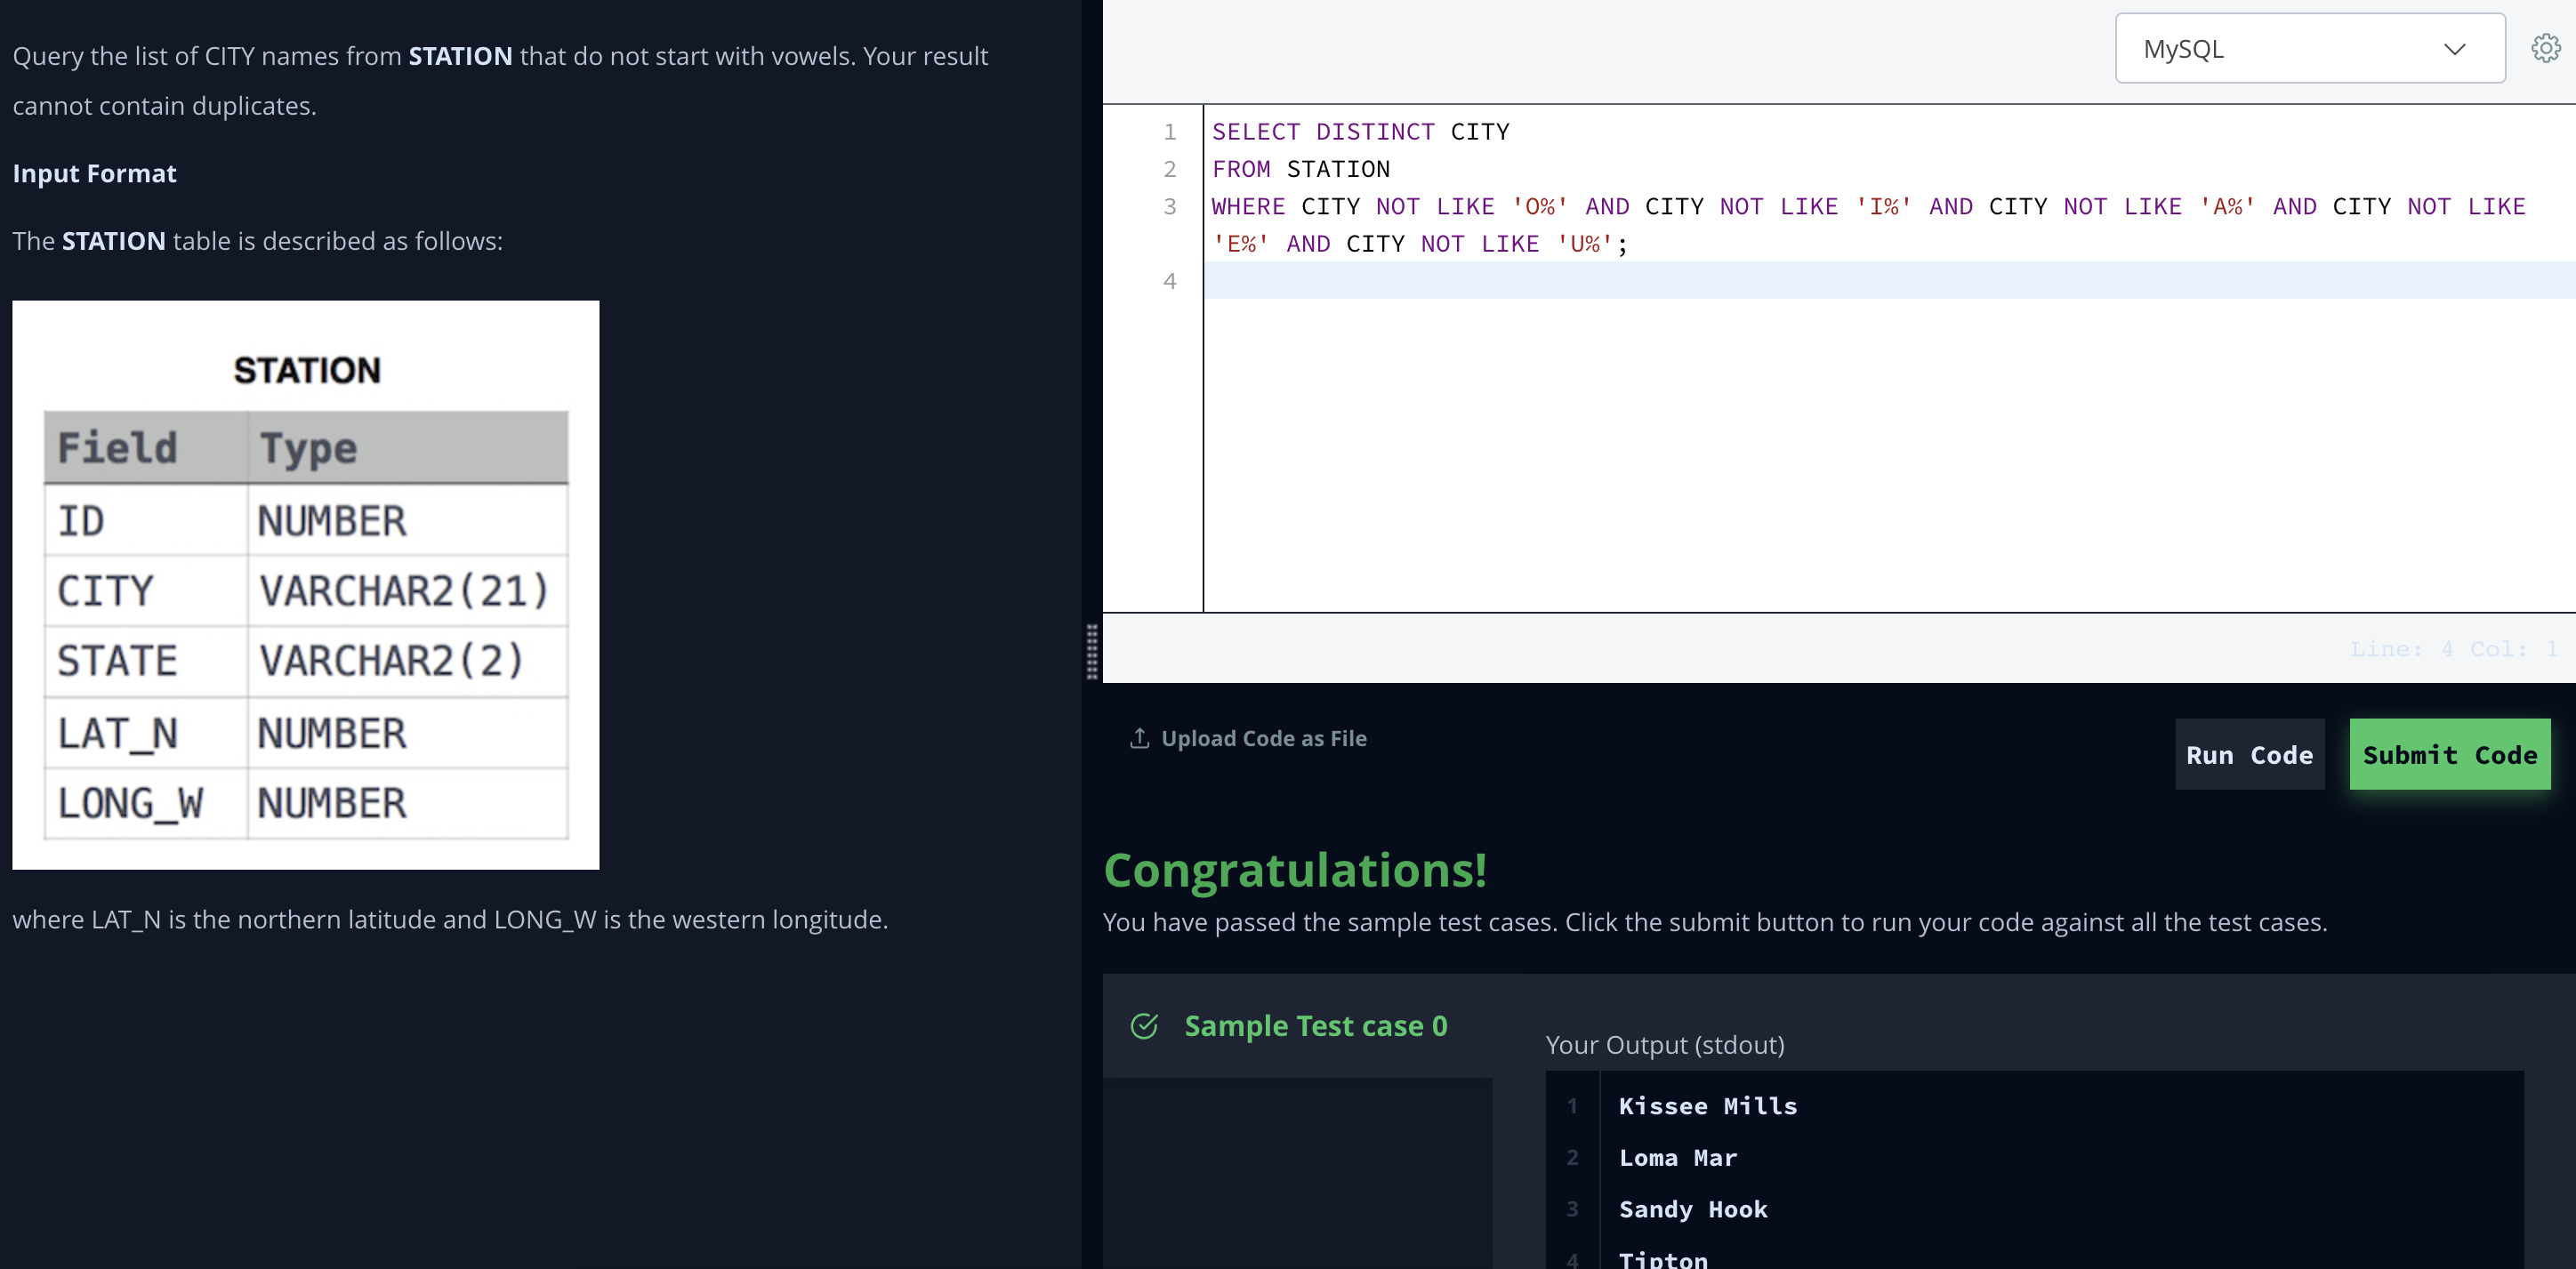

In [26]:
Image("/Users/olha/Desktop/5TASK.jpg", width=700, height=700)

SELECT DISTINCT CITY  
FROM STATION  
WHERE CITY NOT LIKE 'O%' AND CITY NOT LIKE 'I%' AND CITY NOT LIKE 'A%' AND CITY NOT LIKE 'E%' AND CITY NOT LIKE 'U%';